In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df= pd.read_html('https://www.eia.gov/opendata/v1/qb.php?sdid=PET.RBRTE.D')

In [47]:
df = df[0]

In [48]:
df.head()

,Series Name,Period,Frequency,Value,Units
0,"Europe Brent Spot Price FOB, Daily",20221004,D,93.74,Dollars per Barrel
1,"Europe Brent Spot Price FOB, Daily",20221003,D,90.68,Dollars per Barrel
2,"Europe Brent Spot Price FOB, Daily",20220930,D,88.90,Dollars per Barrel
3,"Europe Brent Spot Price FOB, Daily",20220929,D,89.41,Dollars per Barrel
4,"Europe Brent Spot Price FOB, Daily",20220928,D,89.55,Dollars per Barrel


In [8]:
# df.to_csv('brent_spot.csv')

In [49]:
df = df[['Period','Value']]

In [50]:
df['Period'] = pd.to_datetime(df['Period'],format='%Y%m%d')

In [51]:
df.set_index('Period',inplace=True)

In [54]:
df.sort_index(ascending=True,inplace=True)

<AxesSubplot:xlabel='Period'>

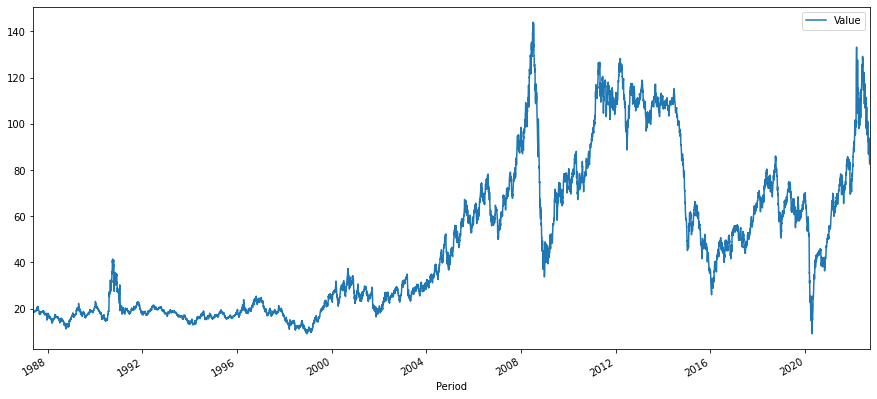

In [55]:
df.plot(figsize=(15,7))

In [56]:
value = df.reset_index(drop=True)

In [81]:
df1 = value.squeeze()

In [83]:
df1

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
8989    89.55
8990    89.41
8991    88.90
8992    90.68
8993    93.74
Name: Value, Length: 8994, dtype: float64

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
y = scaler.fit_transform(value)

In [82]:
y.shape

(8994, 1)

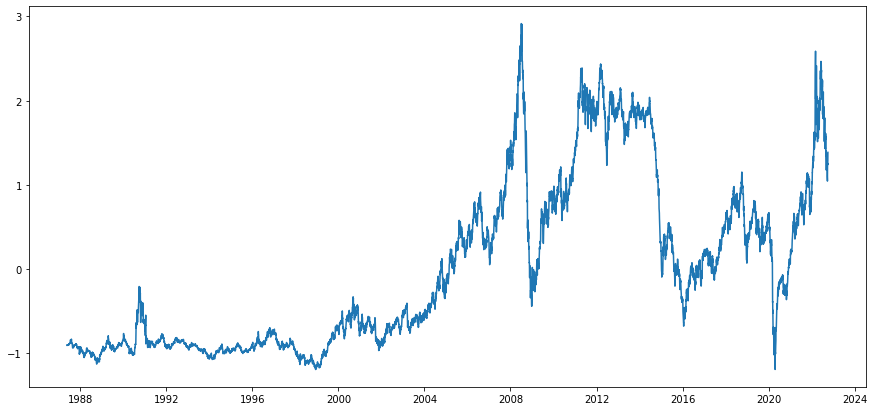

In [61]:
plt.figure(figsize=(15,7))
plt.plot(df.index,y)

In [62]:
w = int(input("Enter window size: "))

Enter window size: 100


In [63]:
value.shape

(8994, 1)

In [64]:
training_size = int(len(df1) * 0.96)
test_size = len(df1) - training_size

In [84]:
train_data = df1[0:training_size + w]
test_data = df1[training_size:len(df1)]

In [85]:
train_data.shape , test_data.shape

((8734,), (360,))

In [86]:
train_data.shape[0] + test_data.shape[0]

9094

In [89]:
def create_dataset(dataset, time_step = 1):
    dataX , dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i+time_step])
    return np.array(dataX), np.array(dataY)

In [90]:
time_step = w
X_train , y_train = create_dataset(train_data, time_step)
X_test , y_test = create_dataset(test_data, time_step)

KeyError: 100